# Machine learning #

In [1]:
# импорт необходимых библиотек 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from statsmodels.tsa.seasonal import seasonal_decompose
import itertools

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Этап 0 - загрузка датасета ##

In [3]:
df = pd.read_csv('real_estimate_after_EDA.csv', engine = 'python' )
df = df.dropna() 
df.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,kitchen_area_decrease
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1,9988.2
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1,9987.0
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1,9989.0
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11,9994.0
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1,9989.0


#### **Описание столбцов** ####

* `date` - дата публикации объявления;
    *   DAY - календарный день появления объявления в формате YYYY-MM-DD
    *   TIME - время в формате HH:MM:SS
* `time`  - время публикации объявления;
* `geo_lat` - Широта;
* `geo_lon `- Долгота;
* `region` - Регион России. Всего в стране 85 субъектов.;
* `building_type` - тип фасада. 0 - Другое. 1 - Панель. 2 - Монолитный. 3 - Кирпич. 4 - Блочный. 5 - Деревянный;
*` object_type` - Тип квартиры. 1 - Вторичный рынок недвижимости; 2 - Новостройка;
* `level` - Этаж квартиры;
* `levels `- Этажность;
* `rooms `- количество жилых комнат. Если значение "-1", то это означает "квартира-студия";
* `area`- общая площадь квартиры;
* `kitchen_area` - площадь кухни;
* `price` - Стоимость в рублях.

## Этап 1 - предсказывание цены недвижимости с использованием модели случайного леса ##

#### Модель 1 - модель случайного леса ####

С помощью модели случайного леса пробуем предсказать стоимость недвижимости с учетом таких ее параметров как: общая площадь, количество комнат и регион. В качестве целевой переменной берем - price, вспомогательных- rooms, area, region. 
Разделяем данные на обучающую и тестовую выборки с помощью функции train_test_split(). Устанавливаем размер тестовой выборки в 20% и задаем random_state для воспроизводимости результатов.

In [4]:
features = ['area', 'rooms', 'region']  
target = 'price'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
print('RMSE:', rmse)

RMSE: 20499409.763037518


В данном случае, полученное значение RMSE будет указывать на среднеквадратичную ошибку модели в предсказании цены недвижимости на основе выбранных признаков (площади, количества комнат и региона). Чем меньше значение RMSE, тем точнее модель предсказывает цены недвижимости.
В результате видно, что среднеквадратическое отклонение между прогнозируемыми значениями и фактическими значениями составляет около 20,499,409.76 рублей

In [5]:
# Расчет среднеквадратической ошибки
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

MSE: 420225800632917.9


Это означает, что среднеквадратическая ошибка между прогнозируемыми значениями и фактическими значениями составляет около 420,225,800,632,917.9 рублей в квадрате. Что также не является хорошим признаком для данной модели 

Чтобы быть точными в своем исследовании, посчитаем коэффициент детерминации.
Чем ближе значение коэффициента детерминации к 1, тем лучше модель объясняет вариацию в целевой переменной. 

In [6]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Вычисление коэффициента детерминации
r2 = r2_score(y_test, y_pred)
print('R^2 Score:', r2)

R^2 Score: 0.08224859716972177


 #### Вывод: 
 В данном случае коэффициент детерминации равен примерно 0.08, что не совсем близкое значение к 1. Отсюда делаем вывод, что модель недостаточно хорошо объясняет вариацию целевой переменной 

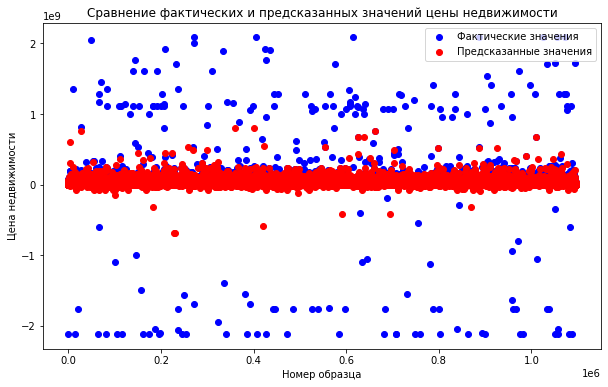

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='b', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='r', label='Предсказанные значения')
plt.xlabel('Номер образца')
plt.ylabel('Цена недвижимости')
plt.title('Сравнение фактических и предсказанных значений цены недвижимости')
plt.legend()
plt.show()

### Модель 2 - модель базовой линейной регрессии

In [30]:
# Выбор признаков для регрессии
features = ['geo_lat', 'geo_lon', 'area', 'rooms', 'kitchen_area']
target_1 = 'price'
# Разделение данных на обучающую и тестовую выборки
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)
# Получение предсказаний на тестовой выборке
y_pred = model.predict(X_test)
# Вычисление среднеквадратичной ошибки
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 448025713551674.2


В этом коде выбираем некоторые признаки (широту, долготу, площадь, количество комнат, площадь кухни) в качестве входных переменных (X) и стоимость недвижимости в рублях в качестве выходной переменной (y). Затем создаем и обучаем модель линейной регрессии, делаем предсказания на тех же данных, и визуализируем результаты, сравнивая фактические цены с предсказанными ценами.



## Этап 2 - Определение самых дорогих и самых дешевых регионов

In [8]:
region_avg_price = df.groupby('region')['price'].mean()

In [9]:
sorted_regions = region_avg_price.sort_values(ascending=False)

In [10]:
highest_price_region = sorted_regions.index[0]
lowest_price_region = sorted_regions.index[-1]

In [11]:
print("Регион с самой высокой средней стоимостью:", highest_price_region)
print("Регион с самой низкой средней стоимостью:", lowest_price_region)

Регион с самой высокой средней стоимостью: 3
Регион с самой низкой средней стоимостью: 5703


## Этап 3 - анализ трендов цен на недвижимость с использованием временных рядов
#### Модель 3  - модель временных рядов

In [12]:
# Преобразование столбца 'date' в формат даты
df['date'] = pd.to_datetime(df['date'])
# Установка столбца 'date' в качестве индекса
df.set_index('date', inplace=True)
# Ресемплирование данных по месяцам и вычисление среднего значения цены
monthly_avg_price = df['price'].resample('M').mean()

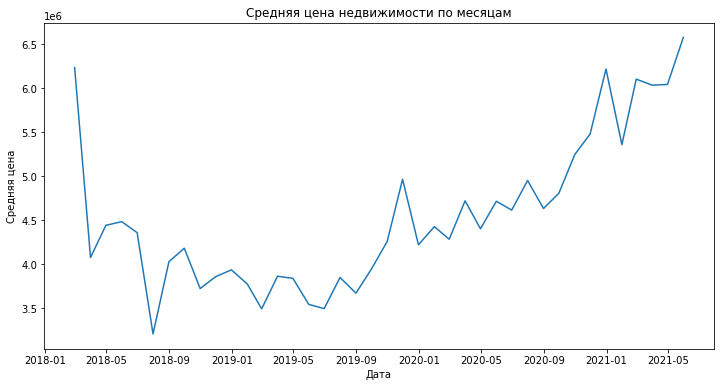

In [13]:
# Визуализация временного ряда средних цен
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_price)
plt.title('Средняя цена недвижимости по месяцам')
plt.xlabel('Дата')
plt.ylabel('Средняя цена')
plt.show()

In [14]:
# Декомпозиция временного ряда
result = seasonal_decompose(monthly_avg_price, model='additive')

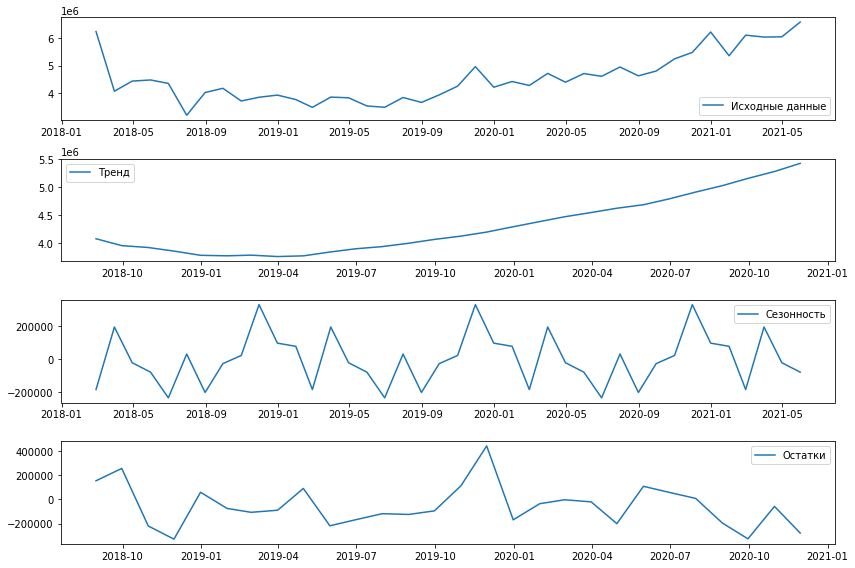

In [15]:
# Визуализация декомпозиции
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(monthly_avg_price, label='Исходные данные')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Тренд')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal, label='Сезонность')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Остатки')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [16]:
# Анализ факторов, влияющих на изменение цен
correlation = df[['price', 'building_type', 'object_type', 'level', 'levels', 'rooms', 'area', 'kitchen_area']].corr()
print(correlation)

                  price  building_type  object_type     level    levels  \
price          1.000000       0.007291     0.006498  0.040225  0.052906   
building_type  0.007291       1.000000    -0.171697 -0.114470 -0.188201   
object_type    0.006498      -0.171697     1.000000  0.241984  0.379506   
level          0.040225      -0.114470     0.241984  1.000000  0.660736   
levels         0.052906      -0.188201     0.379506  0.660736  1.000000   
rooms          0.073896       0.058950    -0.139579 -0.043867 -0.101464   
area           0.121303       0.018955     0.007504  0.051827  0.051191   
kitchen_area   0.061908       0.014443     0.098302  0.107566  0.147516   

                  rooms      area  kitchen_area  
price          0.073896  0.121303      0.061908  
building_type  0.058950  0.018955      0.014443  
object_type   -0.139579  0.007504      0.098302  
level         -0.043867  0.051827      0.107566  
levels        -0.101464  0.051191      0.147516  
rooms          1.000000 

### Вывод: 
1) Цена (price) имеет наибольшую положительную корреляцию с площадью (area), что означает, что чем больше площадь недвижимости, тем выше ее цена.

2) Цена также имеет положительную корреляцию с количеством комнат (rooms), что означает, что недвижимость с большим количеством комнат имеет более высокую цену.

3) Кухонная площадь (kitchen_area) также имеет некоторую положительную корреляцию с ценой, что означает, что недвижимость с большей кухонной площадью может иметь более высокую цену.

4) Другие факторы, такие как тип здания (building_type) и тип объекта (object_type), имеют слабую корреляцию с ценой.

### Этап 4 - Итоги: 
Результаты модели случайного леса имеют достаточно большое отклонение, что говорит о не результативном исходе исследования. 
Модель базовой линейной регрессии так же имеет неточные результаты. Из чего можно сделать вывод, что базовая линейная регрессия может быть недостаточно точной для предсказания цен на недвижимость. 
Анализ трендов на недвижимость при помощи модели временных рядов, на мой взгляд, показала наиболее хороший результат. Благодаря жтому процессу, возможно наглядно посмотреть на средние показатели стоимости недвижжимости по регионам России и сделать соответсвующие выводы. 



### Этап 5 - Гипотезы 
#### Гипотеза 1 - Географическое положение (широта и долгота) влияет на цены недвижимости. Более высокие широты или долготы могут быть связаны с более высокими или низкими ценами соответственно.

В данном случае можно использовать коэффициент корреляции Пирсона для измерения силы и направления линейной связи между географическим положением и ценами недвижимости. Значение коэффициента корреляции будет находиться в диапазоне от -1 до 1, где отрицательное значение указывает на обратную связь, положительное значение - на прямую связь, а близкое к нулю значение - на отсутствие связи.

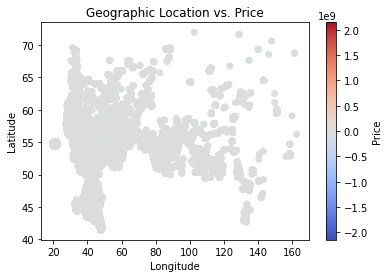

In [20]:
# Создание scatter plot для визуализации связи между географическим положением и ценами
plt.scatter(df['geo_lon'], df['geo_lat'], c=df['price'], cmap='coolwarm')
plt.colorbar(label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Location vs. Price')
plt.show()

In [24]:
# Вычисление коэффициента корреляции между широтой и ценой
import scipy.stats as stats
correlation, p_value = stats.pearsonr(df['geo_lat'], df['price'])
print('Коэффициент корреляции:', correlation)
print('p-значение:', p_value)

Коэффициент корреляции: 0.037456111058319835
p-значение: 0.0


#### Вывод:
Коэффициент корреляции равен 0.037456111058319835. Это значение показывает силу и направление линейной связи между широтой и ценами недвижимости. Близкое к нулю значение указывает на отсутствие или очень слабую связь.

p-значение равно 0.0. В данном случае, нулевое значение p-значения означает, что наблюдаемая корреляция статистически значима.

Таким образом, полученный результат говорит о наличии статистически значимой, но очень слабой прямой линейной связи между широтой и ценами недвижимости.

In [25]:
correlation, p_value = stats.pearsonr(df['geo_lon'], df['price'])
print('Коэффициент корреляции:', correlation)
print('p-значение:', p_value)

Коэффициент корреляции: -0.06283182665310977
p-значение: 0.0


#### Вывод: 
Таким образом, полученный результат говорит о наличии статистически значимой, но очень слабой обратной линейной связи между долготой и ценами недвижимости.

#### Гипотеза 2 - Тип фасада (building_type) оказывает влияние на цены недвижимости. Например, монолитные или кирпичные здания могут иметь более высокие цены по сравнению с деревянными или блочными зданиями.

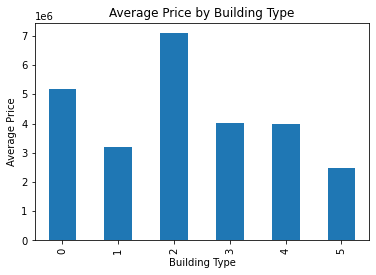

In [21]:
# Группировка данных по типу фасада и вычисление средней цены
avg_price_by_building_type = df.groupby('building_type')['price'].mean()

# Визуализация средних цен по типу фасада
avg_price_by_building_type.plot(kind='bar')
plt.xlabel('Building Type')
plt.ylabel('Average Price')
plt.title('Average Price by Building Type')
plt.show()

In [26]:

# Разделение данных по типу фасада
facade_types = df['building_type'].unique()
groups = [df[df['building_type'] == t]['price'] for t in facade_types]

# Выполнение однофакторного ANOVA
f_value, p_value = stats.f_oneway(*groups)

print('F-значение:', f_value)
print('p-значение:', p_value)

F-значение: 4985.149912481735
p-значение: 0.0


#### Вывод: 
В данном случае, p-значение равно нулю, что означает, что наблюдаемые различия в ценах между разными типами фасада статистически значимы.

Таким образом, результаты указывают на то, что тип фасада оказывает статистически значимое влияние на цены недвижимости, поскольку p-значение равно нулю, что означает отвержение нулевой гипотезы о равенстве средних значений цен между группами.